**Proyecciones de Ventas**

In [101]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

filename = '/content/drive/My Drive/CODING DOJO/Códigos/Semana 2/Pandas_para_manipulacion_datos/sales_predictions.csv'
data = pd.read_csv(filename, sep=",")
data.head() #imprimir cabecera
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

In [57]:
data.count()/len(data)*100    #Analizar el porcentaje de datos que tenemos en las variables

Item_Identifier              100.000000
Item_Weight                   82.834683
Item_Fat_Content             100.000000
Item_Visibility              100.000000
Item_Type                    100.000000
Item_MRP                     100.000000
Outlet_Identifier            100.000000
Outlet_Establishment_Year    100.000000
Outlet_Size                   71.723572
Outlet_Location_Type         100.000000
Outlet_Type                  100.000000
Item_Outlet_Sales            100.000000
dtype: float64

In [58]:
data.isna().sum()/len(data)*100   #Porcentaje de Nulos 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [59]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [60]:
data1=data.dropna(subset=['Outlet_Size']) #Eliminar filas NaN para la columna Outlet_Size
data1                                     #Haciendo este paso se eliminan los datos de varios outlets
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [61]:
data1=data1.fillna(data1.median()['Item_Weight'])   #Rellenar los datos nulos con la mediana la columna Item_Weight 
data1.info()
data1.describe()                                    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.839161,0.064505,141.256859,1995.794373,2322.688445
std,4.075142,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.650000,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [62]:
data1 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [63]:
outlet_ventas=data.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum()
outlet=np.array(outlet_ventas.index)
ventas=np.array(outlet_ventas.values)
outlet
ventas=ventas.astype(float)
ventas

array([[ 188340.1724],
       [2142663.5782],
       [2167465.294 ],
       [1851822.83  ],
       [ 179694.0936],
       [3453926.0514],
       [2268122.9354],
       [2036725.477 ],
       [2118395.1682],
       [2183969.8102]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


(0.0, 4000000.0)

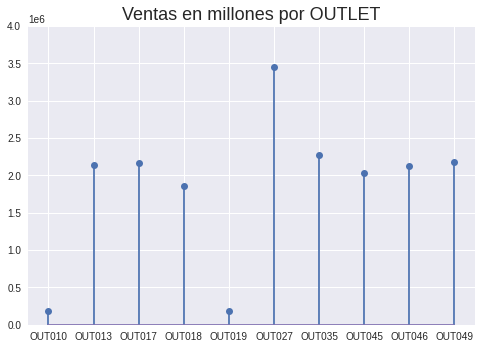

In [64]:
#Ver cual es el outlet que vende más
plt.stem(outlet, ventas);
plt.title('Ventas en millones por OUTLET', fontsize=18)
plt.ylim(bottom=0,top=4000000)

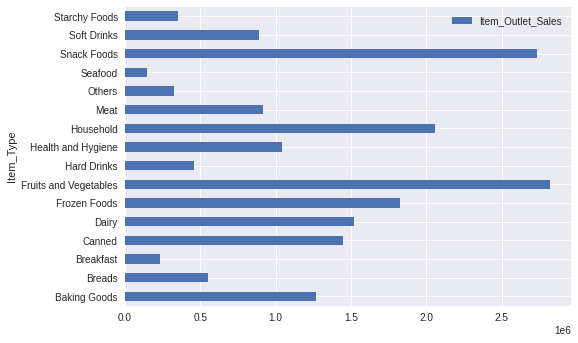

In [65]:
#Productos vendidos en todos los outlets
data.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().plot(kind='barh')

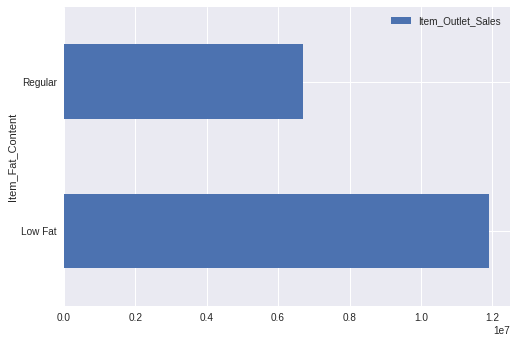

In [66]:
data.Item_Fat_Content=data.Item_Fat_Content.replace({'reg':'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'})
data1.Item_Fat_Content= data1.Item_Fat_Content.replace({'reg':'Regular', 'low fat': 'Low Fat', 'LF': 'Low Fat'}) #Corregir los datos
data.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().plot(kind='barh')

In [67]:
data1.Item_Fat_Content.nunique()

2

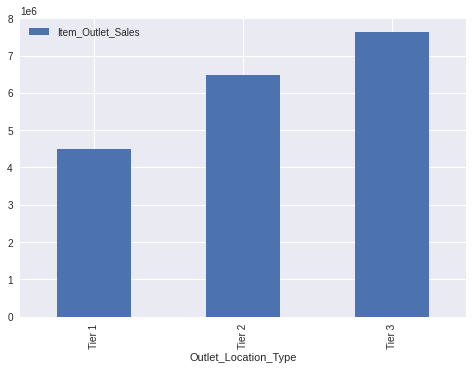

In [68]:
data.groupby(['Outlet_Location_Type'])[['Item_Outlet_Sales']].sum().plot(kind='bar')

**Avance 3**

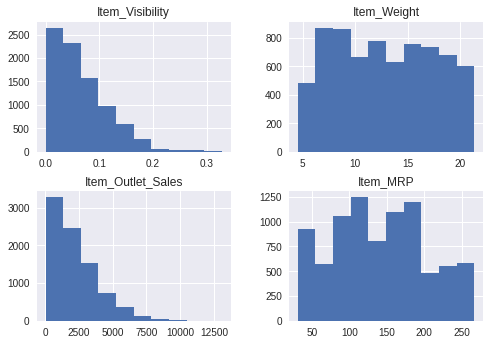

In [69]:
plt.style.use('seaborn')
data[['Item_Visibility','Item_Weight', 'Item_Outlet_Sales', 'Item_MRP']].hist();

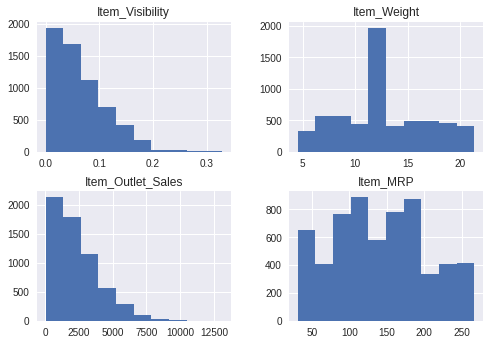

In [70]:
plt.style.use('seaborn')
data1[['Item_Visibility','Item_Weight', 'Item_Outlet_Sales', 'Item_MRP']].hist(); #Grafico con la data trabajada (Item Weight se lleno los NAN con mediana)

In [22]:
sales_per_outlet=data.groupby(['Outlet_Identifier','Item_Type'])[['Item_Outlet_Sales']].sum()


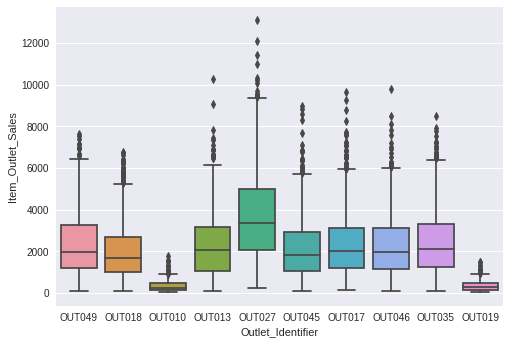

In [23]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=data);

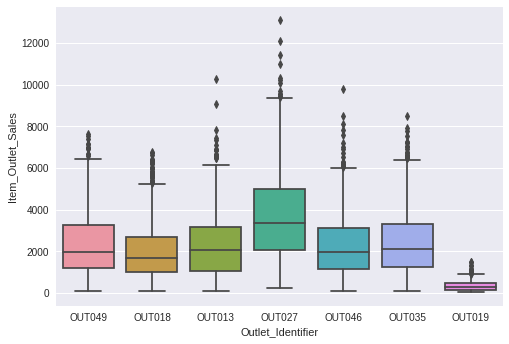

In [24]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=data1); #Gráfico con data depurada

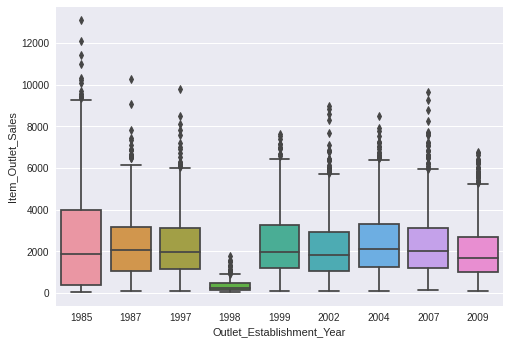

In [25]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=data);

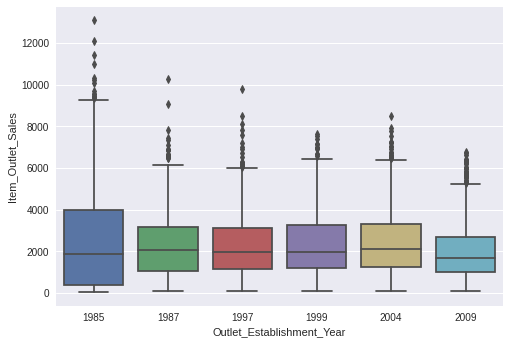

In [71]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=data1); #Graficos con la data depurada

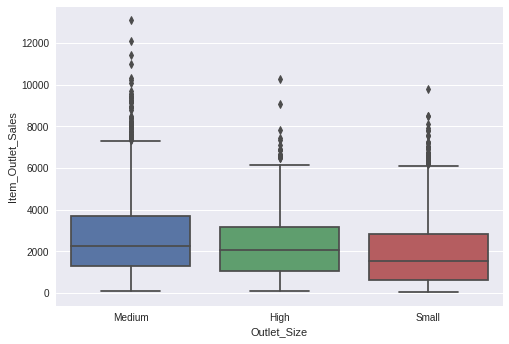

In [29]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales', data=data1);

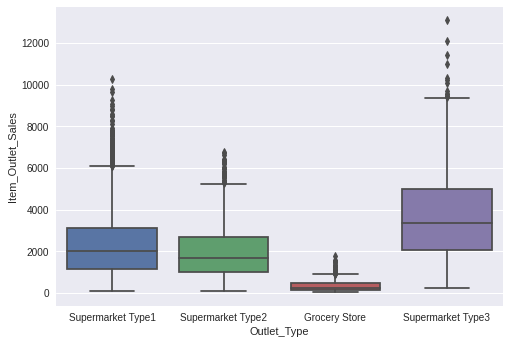

In [31]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales', data=data);

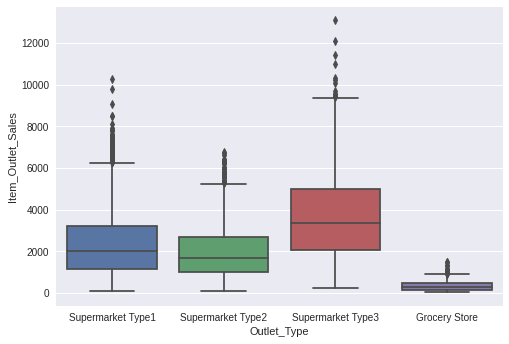

In [32]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales', data=data1);

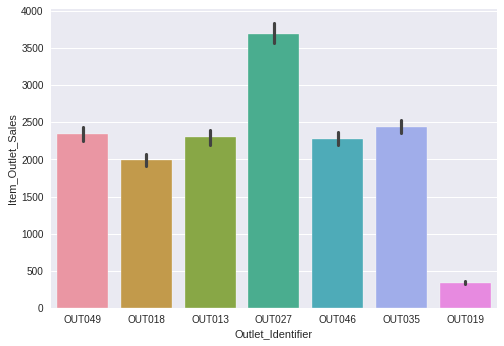

In [ ]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=data1); 

Avance 4

In [72]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [73]:
data1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011467,0.029491,0.010111,0.006877
Item_Visibility,-0.011467,1.000000,-0.000651,-0.087452,-0.105854
Item_MRP,0.029491,-0.000651,1.000000,0.011632,0.588939
Outlet_Establishment_Year,0.010111,-0.087452,0.011632,1.000000,-0.057850
Item_Outlet_Sales,0.006877,-0.105854,0.588939,-0.057850,1.000000


In [98]:
#Codificar variable nominal
tipo_item = LabelEncoder()
type_labels = tipo_item.fit_transform(data1['Item_Type'])
item_classes = {index: label for index, label in 
                  enumerate(tipo_item.classes_)}

location = LabelEncoder()
loc_labels = location.fit_transform(data1['Outlet_Location_Type'])

item_classes
#Fuente: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

{0: 'Baking Goods',
 1: 'Breads',
 2: 'Breakfast',
 3: 'Canned',
 4: 'Dairy',
 5: 'Frozen Foods',
 6: 'Fruits and Vegetables',
 7: 'Hard Drinks',
 8: 'Health and Hygiene',
 9: 'Household',
 10: 'Meat',
 11: 'Others',
 12: 'Seafood',
 13: 'Snack Foods',
 14: 'Soft Drinks',
 15: 'Starchy Foods'}

In [99]:
data1['Item_type_label'] = type_labels

In [114]:
#Codificar variables en data
location = LabelEncoder()
loc_labels = location.fit_transform(data['Outlet_Location_Type'])
data['Location_labels'] = loc_labels

tipo_outlet = LabelEncoder()
outlet_labels = location.fit_transform(data['Outlet_Type'])
data['Outlet_type_labels'] = outlet_labels

outlet_size = LabelEncoder()
outletsize_labels = outlet_size.fit_transform(data['Outlet_Size'])
data['Outlet_size_labels'] = outletsize_labels

fat = LabelEncoder()
fat_labels = fat.fit_transform(data['Item_Fat_Content'])
data['Fat_content_Label'] = fat_labels

outlet_id=LabelEncoder()
id_labels = outlet_id.fit_transform(data['Outlet_Identifier'])
data['ID_Label'] = id_labels


In [138]:
#Codificar variables data1

location = LabelEncoder()
loc_labels = location.fit_transform(data1['Outlet_Location_Type'])
data1['Location_labels'] = loc_labels

tipo_outlet = LabelEncoder()
outlet_labels = tipo_outlet.fit_transform(data1['Outlet_Type'])
data1['Outlet_type_labels'] = outlet_labels

outlet_size = LabelEncoder()
outletsize_labels = outlet_size.fit_transform(data1['Outlet_Size'])
data1['Outlet_size_labels'] = outletsize_labels

fat = LabelEncoder()
fat_labels = fat.fit_transform(data1['Item_Fat_Content'])
data1['Fat_content_Label'] = fat_labels

outlet_id=LabelEncoder()
id_labels = outlet_id.fit_transform(data1['Outlet_Identifier'])
data1['ID_Label'] = id_labels

data1.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type_label,Location_labels,Outlet_type_labels,Outlet_size_labels,Fat_content_Label,ID_Label
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4,0,1,1,0,6
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14,2,2,1,1,1
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10,0,1,1,0,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9,2,1,0,0,0
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0,2,2,1,1,1


In [139]:
data1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_type_label,Location_labels,Outlet_type_labels,Outlet_size_labels,Fat_content_Label,ID_Label
Item_Weight,1.000000,-0.011467,0.029491,0.010111,0.006877,0.029928,0.000518,-0.010568,-0.013754,-0.028719,-0.003329
Item_Visibility,-0.011467,1.000000,-0.000651,-0.087452,-0.105854,-0.025506,-0.103078,-0.144951,0.096773,0.047486,-0.039651
Item_MRP,0.029491,-0.000651,1.000000,0.011632,0.588939,0.036465,0.000321,-0.004840,0.005827,0.011656,0.000088
Outlet_Establishment_Year,0.010111,-0.087452,0.011632,1.000000,-0.057850,0.005424,-0.089391,-0.048919,0.298431,0.003629,0.222275
Item_Outlet_Sales,0.006877,-0.105854,0.588939,-0.057850,1.000000,0.020482,0.206719,0.368181,-0.129076,0.013739,0.083344
Item_type_label,0.029928,-0.025506,0.036465,0.005424,0.020482,1.000000,0.003727,0.004805,-0.001771,-0.145258,0.004036
Location_labels,0.000518,-0.103078,0.000321,-0.089391,0.206719,0.003727,1.000000,0.670156,-0.635185,-0.002116,-0.765696
Outlet_type_labels,-0.010568,-0.144951,-0.004840,-0.048919,0.368181,0.004805,0.670156,1.000000,-0.297053,0.002697,-0.139811
Outlet_size_labels,-0.013754,0.096773,0.005827,0.298431,-0.129076,-0.001771,-0.635185,-0.297053,1.000000,-0.000979,0.568595
Fat_content_Label,-0.028719,0.047486,0.011656,0.003629,0.013739,-0.145258,-0.002116,0.002697,-0.000979,1.000000,0.004814


In [140]:
#Codigo para analizar las correlaciones sin la depuración de los datos
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Location_labels,Outlet_type_labels,Outlet_size_labels,Fat_content_Label,ID_Label
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123,0.004715,-0.001088,-0.015656,-0.018929,-0.007995
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625,-0.028099,-0.173468,0.087796,0.034042,-0.100439
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574,0.000232,-0.001975,-0.002473,-0.000876,0.003319
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135,-0.089216,-0.122304,0.470343,-0.000189,0.079035
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000,0.089367,0.401522,-0.172477,0.009800,0.162325
Location_labels,0.004715,-0.028099,0.000232,-0.089216,0.089367,1.000000,0.467219,-0.290216,-0.004102,-0.716176
Outlet_type_labels,-0.001088,-0.173468,-0.001975,-0.122304,0.401522,0.467219,1.000000,-0.432062,-0.004214,0.099873
Outlet_size_labels,-0.015656,0.087796,-0.002473,0.470343,-0.172477,-0.290216,-0.432062,1.000000,-0.004795,0.053224
Fat_content_Label,-0.018929,0.034042,-0.000876,-0.000189,0.009800,-0.004102,-0.004214,-0.004795,1.000000,-0.002357
ID_Label,-0.007995,-0.100439,0.003319,0.079035,0.162325,-0.716176,0.099873,0.053224,-0.002357,1.000000


REGRESION PARA PREDECIR VENTAS

In [141]:
X=data1[['Outlet_type_labels', 'Item_MRP','Outlet_type_labels', 'Location_labels', 'ID_Label','Item_type_label']]
y=data1['Item_Outlet_Sales']

In [142]:
X.shape

(6113, 6)

In [143]:
y.shape

(6113,)

In [144]:
#Scale Data
scaler = StandardScaler()
# Ajuste en X (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X)
# Transform X
X=scaler.transform(X)

In [145]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(X,y)

KNeighborsRegressor()

In [146]:
sales_preds=knn_reg.predict(X)

In [147]:
knn_reg.score(X,y)

0.6761014090089845